<a href="https://colab.research.google.com/github/abelowska/eegML-excercises/blob/main/Classes_02_Arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Arrays and DataFrames

<a name='Review'></a>
## Review from the first lecture


The first lecture covered basic mathematical operations, variables, and lists. That lecture also introduced you to conditional statements, loops, and basic plotting using matplotlib. Before moving forward, here is a quick review.

In [2]:
ourList = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

 **Loops** with **dummy variables** are useful to iterate over lists and perform operations on each element.

In [ ]:
i = 0
while i < len(ourList):
    num = ourList[i] * 10
    print(num)
    i = i+1

Conditional statements like **if** and **else** are used to implement more complex logic.

In [ ]:
i = 0
while i < len(ourList):
    num = ourList[i]
    if num < 5:
        print(num)
    else:
        print("I only print numbers less than 5!")
    i = i+1

The other kind of loop that you might encounter more often while working in Python is the `for` loop. A for-loop has the dummy variable "built in," in a sense.

In [ ]:
for num in ourList:
    print(num)

The `range` function can be iterated over to produce a regular sequence of numbers.

`range` can be used as `range(end_)`, or as `range(start_, end_)`, or as `range(start_, end_, step_)`. Here's the [official documentation](https://docs.python.org/3/library/functions.html#func-range) as well as an [easier-to-read explainer webpage](https://www.w3schools.com/python/ref_func_range.asp).

In [ ]:
for num in range(10):
    print(num)

Finally, recall that the **matplotlib** module can be used to plot data.

First, import the module - this is always the first step whenever you're using a python module, but it's easy to forget! Then, we use a magic command that makes the figure appear within the cell.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

squareList = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

plt.plot(ourList,squareList)
plt.show()

# Lecture 2 - NumPy, Functions, and Data

Today, we will learn about NumPy and learn about handling data in Python.

1. An introduction to **numpy** and **numpy arrays** and a discussion of their usefulness in solving real problems
3. Introduction to **Pandas** dataframes.
    

<a name='intro'></a>
## A. Introduction to Numpy Arrays - Initialization and Advanced Indexing

The Python `list` is a fast and flexible built-in data type, but because of its flexbility, it is limited in the operations we can perform on it. A popular scientific computing package called `numpy`, short for "numerical Python", can help by way of its incredibly powerful object type: the `array`.

In [8]:
c = list(range(10))

In [ ]:
d = c**2
print(d)

The code above yielded an error - lists and ranges do not support mathematical operations. The solution is to perform the operation in a loop:

In [ ]:
d = []
for item in c:
  d_item = item**2
  d.append(d_item)
print(d)

Or using list comprehension:

In [ ]:
d = [item**2 for item in c]
print(d)

But the most efficient and elegant way is provided via numpy library. 

First, import the numpy module. We typically abbreviate it as `np`.

To convert the list to a numpy array, use `np.array()`.
<a name='array'></a>

In [13]:
# Import the numpy lib
import numpy as np

In [14]:
# convert the list c to an array
c = np.array(c)

In [ ]:
d = c**2
print(d)

<a name='ranges'></a>
There are a few easier ways to create arrays besides creating a list and turning it into a numpy array. These include:
* `np.arange(start_,stop_,step_)`
* `np.linspace(first_,last_,num_)`

(And the accompanying official documentation pages: [numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), [numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace))

These create arrays of numbers within a range with a fixed step-size between each consecutive number in the array. You can try these out below.

`np.arange(start_,stop_,step_)` works just like the `range` function we introduced at the beginning of this lesson! But instead of the mysterious `range` object type, the numpy function returns a nice, neat numpy array.

In [ ]:
np.arange(0, 10, 1)

In [ ]:
np.linspace(0, 10, 11)

<a name='empty'></a>
Sometimes it is handy to create an array of all constant values, which can then be replaced later with data. This can be done in several ways by using the following commands:

* [`np.zeros(size_)`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) To fill the array with zeros
* [`np.ones(size_)`](https://numpy.org/doc/stable/reference/generated/numpy.oness.html) To fill the array with ones
* [`np.empty(size_)`](https://numpy.org/doc/stable/reference/generated/numpy.empty.html) To fill the array with arbitrary values

These create arrays of the given size, filled with zeros, ones, or arbitrary values, depending on your specific needs. Great for initializing an array to store important data in later!

In [ ]:
data = np.zeros(10)
print(data)

<a name='indexing'></a>
We can also assign new values to elements of existing arrays, using the following "square bracket" notation. This is the same as the list indexing we taught you in Lecture #1!
> `array_name[index_number] = value` 

This command will replace whatever value is currently in the position corresponding to ``index_number`` in the array called ``array_name`` with the value stored in ``value``.

Recall that arrays are numbered starting from 0, such that

* Index of first position = 0
* Index of second position = 1
* Index of third position = 2
* etc.


In [ ]:
data[0] = 2
print(data[0])

**Negative indexing** is the same as normal indexing, but backward, in the sense that you start with the last element of the array and count forward.  More explicitly, for any array:

* array[-1] = last element of array
* array[-2] = second to last element of the array
* array[-3] = third to last element of the array
* etc

<a name='neg_ex'></a>
### **Exercise 1**: Negative Indexing


Create an array with 10 elements using `np.arange()` and print out the last and second-to-last elements using negative indexing!

In [ ]:
#Your code goes here

Sometimes it's useful to access more than one element of an array. Let's say that we have an array spanning the range [0,10] (including endpoints), with a step size of 0.1. If you recall, this can be done via the `np.linspace()` or `np.arange()` functions.

<a name='slicing'></a>
In order to get a range of elements in an array, rather than simply a single one, use **array slicing**:

* `array_name[start_index:end_index]` To grab all of the values from `start_index` to `end_index - 1`
* `array_name[:end_index]` To grab all of the values up to `end_index-1`
* `array_name[start_index:]` To grab all of the values from `start_index` and beyond

In this notation, ":" means you want everything between your start and end indices, including the value to the left but excluding the value to the right.

<a name='range_ex'></a>
### **Exercise 2**: `np.linspace` and `np.arange`


Create an array named `x` of values from 0 to 10 (including 10) in steps of 0.1. *(Hint: use `np.arange` or `np.linspace`)*

In [ ]:
#Your code here

Once you're done above, **think** about what these slices should print, but don't run them yet! **Put your answers onto a piece of paper and then check your answers running the code.**

In [ ]:
x[1:4]

x[90:]

x[:25]

<a name='slice_ex'></a>
### **Exercise 3**: Indexing and slicing 



So, let's say that you would want everything up to and including the tenth element of the array $x$. How would you do that?

(Remember, the tenth element has an index of 9)

In [ ]:
#Your code goes here

Now try to select just the first half of the array. 

In [ ]:
#Your code goes here

Then, pick out middle sixty elements of the array.

In [ ]:
#Your code goes here

Let's try a few more. In the next block of code, perform the following actions on different lines:

* Access all elements of your `x` up to, but not including the 17th element
* Access the last 20 elements of `x`
* Create a new array named `y` that contains the 12th through 38th elements of `x`, including the 38th element


In [ ]:
#Your code goes here

Finally, how would you get all of the elements in the array using colon notation?

In [ ]:
#Your code goes here

<a name='df'></a>
## B. Introduction to Padas Dataframes

A Pandas DataFrame is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.

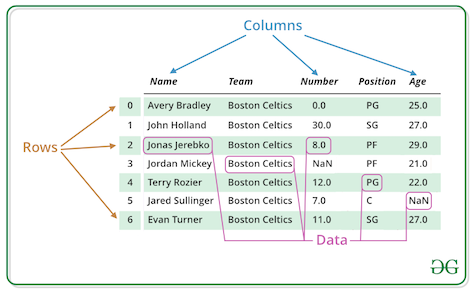

[Source](https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png)

In [26]:
# Import the pandas lib
import pandas as pd

## Series

[`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) is a one-dimensional labeled array capable of holding any data
type (integers, strings, floating point numbers, Python objects, etc.). The axis
labels are collectively referred to as the **index**. The basic method to create a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) is to call:

> `s = pd.Series(data, index=index)`

Here, data can be many different things:

- a Python dict
- an ndarray
- a scalar value (like 5)

The passed index is a list of axis labels. Thus, this separates into a few cases depending on what data is:

#### From dict

In [38]:
# create a dict of values
d = {"b": 1, "a": 0, "c": 2}

In [ ]:
# create a pandas Series from dict
pd.Series(d)

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [ ]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}
pd.Series(d, index=["b", "c", "d", "a"])

NaN (not a number) is the standard missing data marker used in pandas.

#### From ndarray

If `data` is an ndarray, index must be the same length as data. If no index is passed, one will be created having values `[0, ..., len(data) - 1]`.

In [ ]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

In [ ]:
s = pd.Series(np.random.randn(5))
s

#### From scalar value

If `data` is a scalar value, an index must be provided. The value will be repeated to match the length of **index**.

In [ ]:
v = pd.Series(5.0, index=["a", "b", "c", "d", "e"])
v

### Series is ndarray-like

`Series` acts very similarly to a `ndarray` and is a valid argument to most NumPy functions. However, **operations such as slicing will also slice the index**.


In [ ]:
s = pd.Series(np.random.randn(5))
s

In [ ]:
s[0]

In [ ]:
s[:3]

In [ ]:
s[s > s.median()]

In [ ]:
# yield error
s[4, 3, 1]

In [ ]:
# right way to slice specific sub-set of values based on indexes
s_subset = s[[4, 3, 1]]
s_subset

In [ ]:
type(s_subset)

In [ ]:
np.exp(s)

While `Series` is ndarray-like, if you need an actual `ndarray`, then use `Series.to_numpy()`.

In [ ]:
s.to_numpy()

### Series is dict-like

A `Series` is also like a fixed-size dict in that you can get and set values by index label:

In [ ]:
s = pd.Series(np.random.randn(5), index = ["a", "b", "c", "d", "e"])
s

In [ ]:
s["a"]

In [ ]:
s["e"] = 12.0
s

In [ ]:
"e" in s

In [ ]:
"f" in s

In [ ]:
# If a label is not contained in the index, an exception is raised:
s["f"]

## DataFrame

[`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or a dict of Series objects. It is generally the most commonly used pandas object.

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

## Object creation


### From dict of Series or dicts

In [83]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

In [ ]:
df = pd.DataFrame(d)
df

### From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must also be the same length as the arrays. If no index is passed, the result will be `range(n)`, where n is the array length.

In [ ]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
d

In [ ]:
pd.DataFrame(d)

### From dict of Objects

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

In [ ]:
df2.dtypes

## Viewing data

Use `DataFrame.head()` and `DataFrame.tail()` to view the top and bottom rows of the frame respectively:

In [ ]:
indexes = np.arange(0,20)
df = pd.DataFrame(np.random.randn(20, 4), index=indexes, columns=list("ABCD"))
df

In [ ]:
# view few records from top
df.head()

In [ ]:
# view few records from bottom
df.tail()

`DataFrame.to_numpy()` gives a NumPy representation of the underlying data. 

In [ ]:
# gives 2D np array
df.to_numpy()

## Selection

See the indexing documentation [`Indexing and Selecting Data`](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing) and [`MultiIndex / Advanced Indexing`](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced).

In [ ]:
indexes = np.arange(0,20)
df = pd.DataFrame(np.random.randn(20, 4), index=indexes, columns=list("ABCD"))
df

### Getting

Selecting a single column, which yields a `Series`, equivalent to `df.A`:

In [ ]:
df["A"]

Selecting via `[]` (`__getitem__`), which slices the rows:

In [ ]:
df[1:4]

### Selection by label


See more in [Selection by Label](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label) using `DataFrame.loc()` or `DataFrame.at()`.

In [ ]:
df.loc[[2]]

In [ ]:
df.loc[1:5, ["A", "B"]]

In [ ]:
df.loc[2, ["A", "B"]]

###  Boolean indexing
> `df[df['col'] == value]` 

Selecting subset of dataframe where colum *A* is greater than 0.*italicised text*

In [ ]:
df[df["A"] > 0]

Selecting subset of dataframe where colum *A* is greater than 0 and then getting only colums *B* and *D*.

In [ ]:
df[df["A"] > 0].loc[:,["B", "D"]]

### Selection by position

See more in [Selection by Position](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer) using `DataFrame.iloc()` or `DataFrame.at()`.

In [ ]:
df.iloc[3:5, 0:2]

In [ ]:
df.iloc[[1, 2, 5], [0, 2]]

In [ ]:
df.iloc[1:3, :]

More in [**10 minutes to pandas**](https://pandas.pydata.org/docs/user_guide/10min.html) :)

## **Excercise 1**:

*   Create an 20-elements *values* array filled with integer values from 0 to 20.
*   Create a dataframe with column names *values*, *sqrt*, *square*. Ech column fill with array *values* transformed in a way that corresponds to column name (i.e. column named 'sqrt' should contain square roots of the elements of the *values* array).
*   Add a column named *is_even* which mark whether value in column *values* is even or odd.



In [140]:
#Your code goes here

## Excercise 2:

From created dataframe:
*   select column *square* and values that are larger than 5. 
*   then select items where colum *ID* equals *even* ...
*   ... and calculate mean of selected values.



In [209]:
#Your code goes here